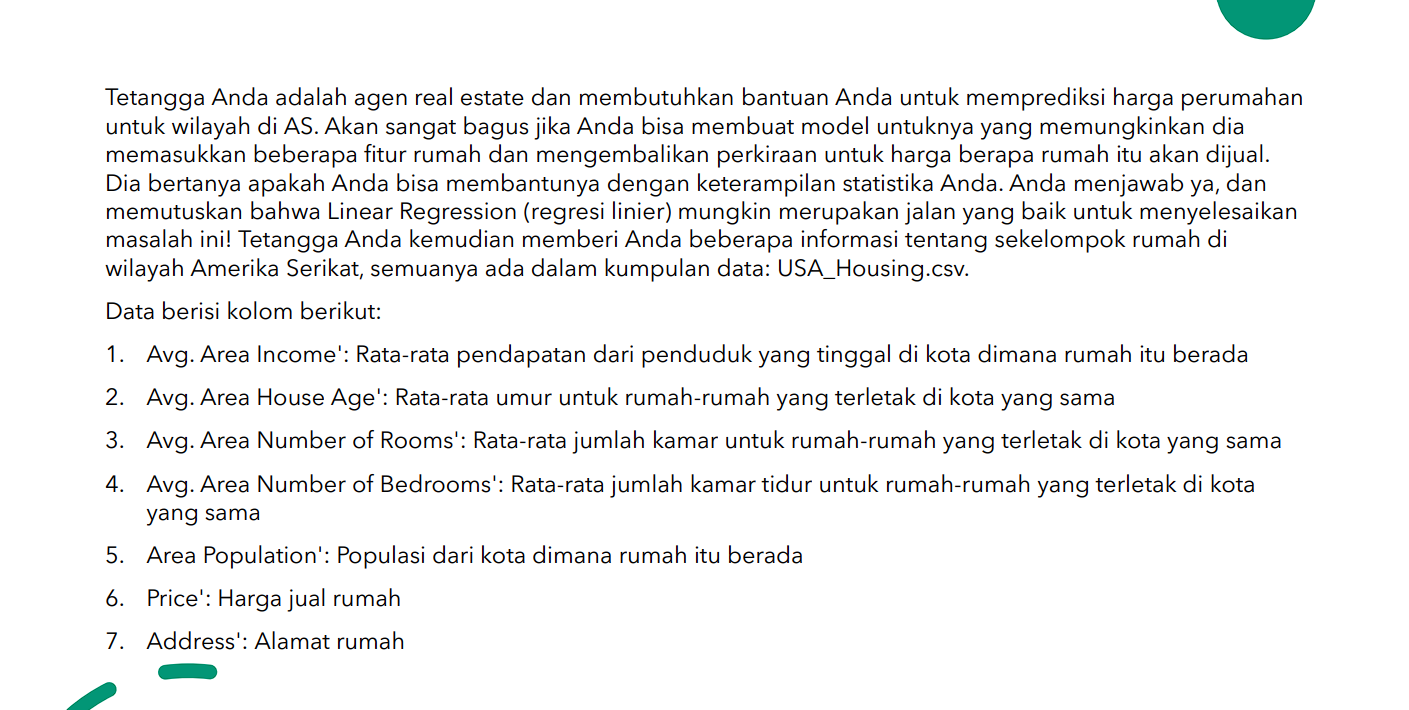

In [2]:
# Import necessary libriraries

import pandas as pd 
import numpy as np 
import warnings 
# Import visualization libraries 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
df = pd.read_csv("../data/dataset.csv")

Data Inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
# Descriptive statisticvs 
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
# Display 5 row from the dataset 
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
# Check for null values in the dataset

null_values = df.isnull().sum()
null_values

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [8]:
# Delete null values from the dataset
df = df.dropna()

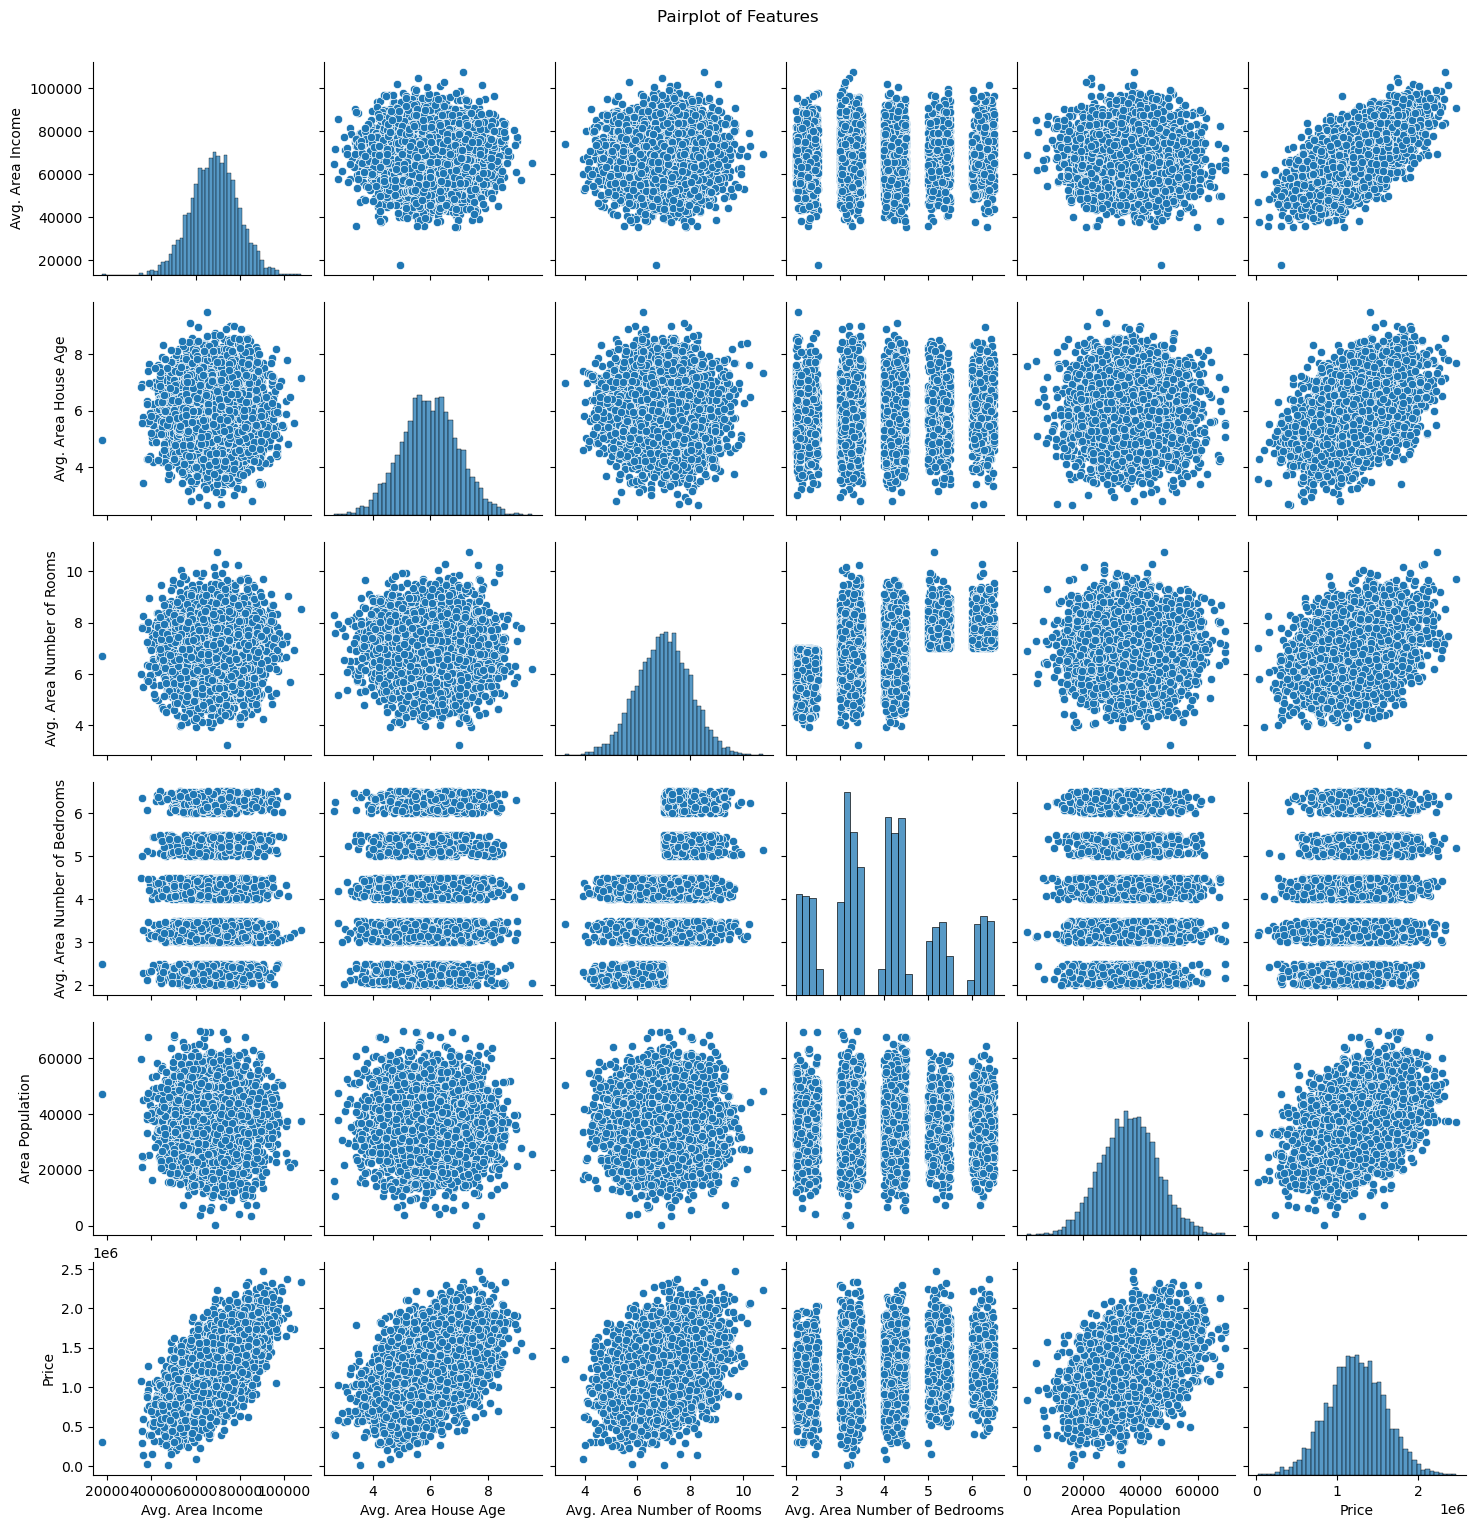

In [9]:
# Visualize the pairplot of features
sns.pairplot(df)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

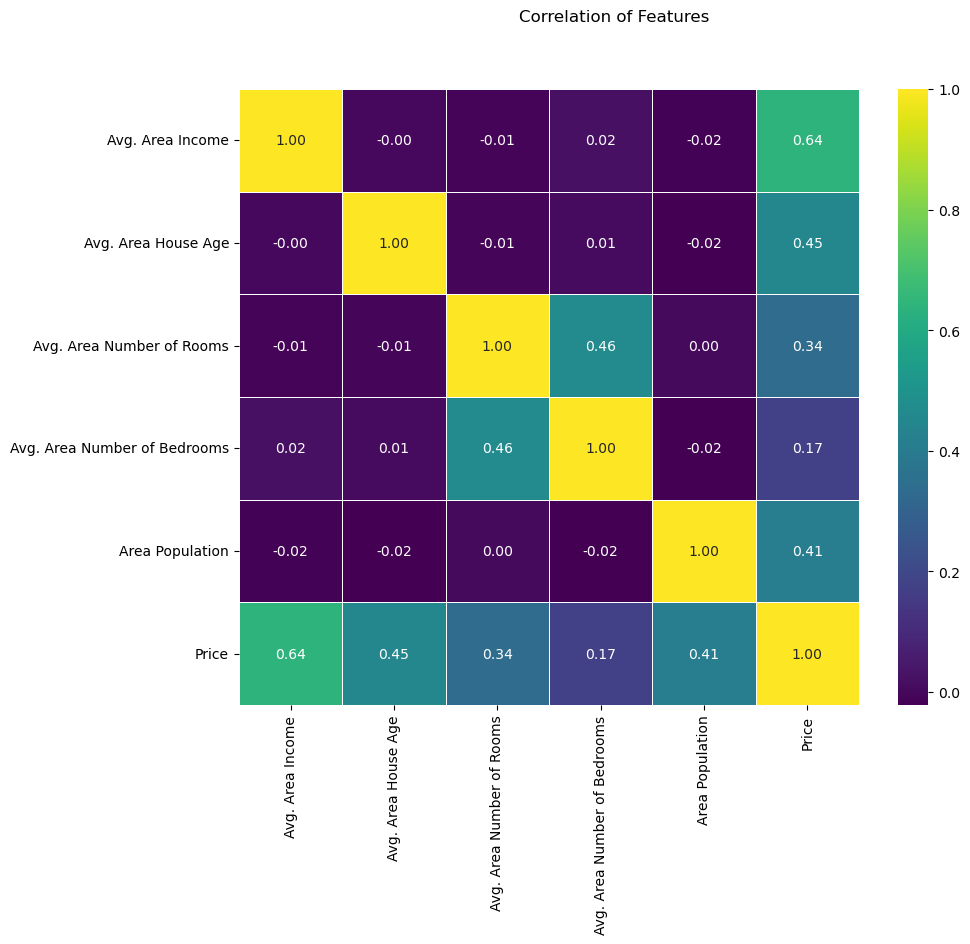

In [10]:
# Identify which features have a linear relationship with 'Price'
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.suptitle("Correlation of Features")
plt.show()

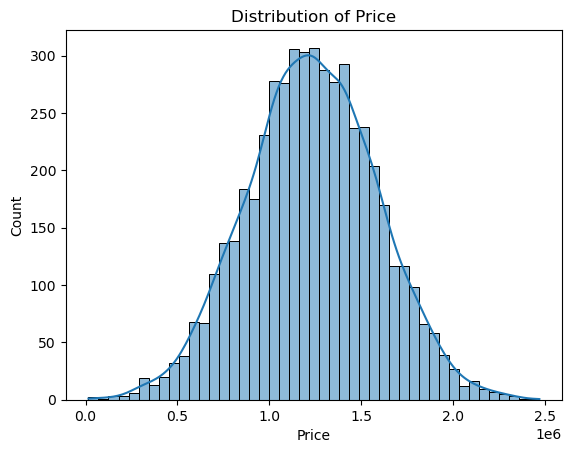

In [11]:
# Visualize distruibution of 'Price' feature
price_distribution = df['Price']
sns.histplot(price_distribution, kde=True)
plt.title("Distribution of Price")
plt.show()

In [12]:
# Prepare the data for training 
X = df.drop(columns=['Price', 'Address'])
y = df['Price']

# Using train test split to create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training size of X_train: {len(X_train)} samples")
print(f"Test size of X_test: {len(X_test)} samples")


Training size of X_train: 3500 samples
Test size of X_test: 1500 samples


Define, evaluate, and tests the models 

In [13]:
# Define the model of linear regression
lm = LinearRegression()

# Fit the model to the training data
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
# Evaluate the model on the test data
coef_data = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(f"Coefficients of the model: {coef_data}")
print(f"Intercept of the model: {lm.intercept_}")


Coefficients of the model:                                 Coefficient
Avg. Area Income                  21.625799
Avg. Area House Age           165590.392746
Avg. Area Number of Rooms     119827.783390
Avg. Area Number of Bedrooms    2361.095262
Area Population                   15.216581
Intercept of the model: -2638673.4261913267


In [15]:
predictions = lm.predict(X_test)

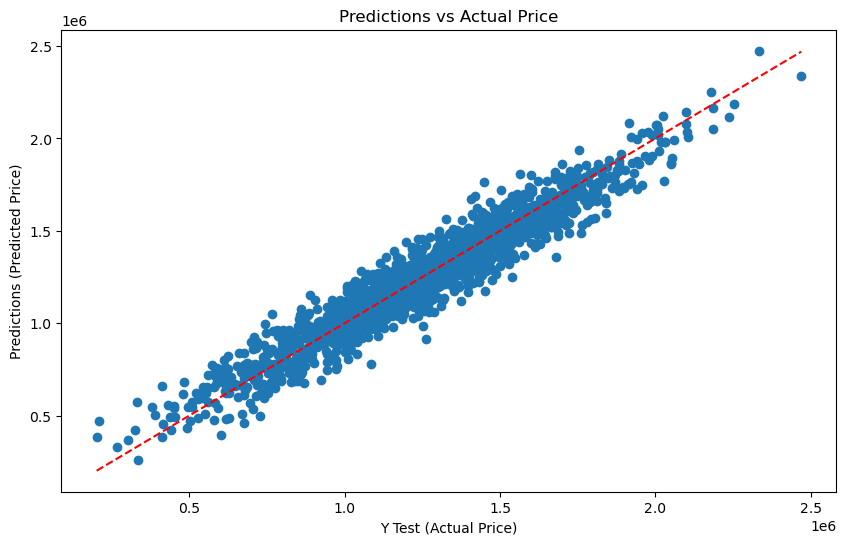

In [16]:
# Visualize the predictions vs price
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel("Y Test (Actual Price)")
plt.ylabel("Predictions (Predicted Price)")
plt.title("Predictions vs Actual Price")

# Plot a line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--" )
plt.show()

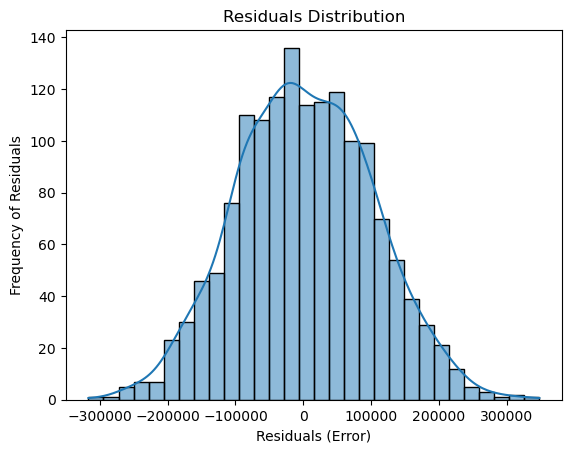

In [17]:
# Check the residuals 
residuals = y_test - predictions
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals (Error)")
plt.ylabel("Frequency of Residuals")
plt.show()

In [18]:
# Calculate the performance metrics '
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)


In [19]:
print("-----------Model Performance Metrics-----------")
print(f"Mean Absolute Error (MAE)       : {mae:.2f}")
print(f"Mean Squared Error (MSE)        : {mse:.2f}")
print(f"Root Mean Squared Error (RMSE)  : {rmse:.2f}")

-----------Model Performance Metrics-----------
Mean Absolute Error (MAE)       : 81135.57
Mean Squared Error (MSE)        : 10068422551.40
Root Mean Squared Error (RMSE)  : 100341.53


In [20]:
new_data = pd.DataFrame({
    'Avg. Area Income': [74568.64],
    'Avg. Area House Age': [5.182],
    'Avg. Area Number of Rooms': [7.62],
    'Avg. Area Number of Bedrooms': [4.09],
    'Area Population': [25045.34],
})


In [21]:
# Make predictions on new data
new_predictions = lm.predict(new_data)

print(f"Predicted Price for new data: {new_predictions[0]:.0f}")

Predicted Price for new data: 1135871
